<a href="https://colab.research.google.com/github/ABDELLAH-Hallou/BigMart-outlet-sales-prediction/blob/master/BigMart_outlet_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Description** : BigMart outlets Sales Prediction







#### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
## Our objective
#### Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

##We will handle this problem in a structured way. We will be following the table of content given below:

### 1.   Hypothesis Generation
### 2.   Loading Packages and Data
###3.   Data Structure and Content
###4.   Exploratory Data Analysis
###5.   Univariate Analysis
###6.   Bivariate Analysis
###7.   Missing Value Treatment
###8.   Feature Engineering
###9.   Encoding Categorical Variables
###10.   Label Encoding
###11.   One Hot Encoding
###12.   PreProcessing Data
###13.   Modeling
###14.   Summary

#**Hypothesis Generation**


##Features based on the Store : 
####1.   The city in which the store is located : 
*   Stores located in urban cities should have higher sales compared to stores in rural areas
*   Stores located in big cities should have higher sales compared to stores located in small cities.

####2.   The location of the store in the city :
*   Stores located in the city center should have higher sales compared to stores on the outskirts of the city.

####3.   Competitor stores :
*   Stores close to competitor stores should sell less than other stores far away from competitor stores.

####4.   Size of the store :
*   Large stores should have higher sales than medium and small stores.

####5.   Store design and architecture: 
*   Well-designed stores can attract customers.

####6.   Marketing: 
*   Stores having a good marketing division can attract customers through the right offers.

##Features based on the Product : 
####1.   Product Utility:
*   Daily use products have a higher tendency to sell compared to other products.

####2.   Product Quality
*   The quality of the product and its packaging can attract customers and sell more.

####3.   Product Visibility in the store: 
*   Products that are placed in an attention-catching place should have higher sales.

####4.   Product Branding: 
*   Branded products have more trust of the customers so they should have high sales.

##Features based on the Customer : 
####1.   Job profile and annual income: 
*   A customer with a stable job and high income should have higher purchases.

####2.   Family size: 
*   A customer with a large family should have higher purchases

# **Loading Packages and Data**

In [193]:
# install required libs
!pip install fuzzywuzzy

In [194]:
# Loading Packages
import numpy as np
import pandas as pd
# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Inconsistent Data Entry
import fuzzywuzzy
from fuzzywuzzy import process
import warnings
warnings.filterwarnings('ignore') #ignore annoying warning (from sklearn and seaborn)

In [195]:
# Loading Data
filename = '/content/drive/MyDrive/Bigmart/Train.csv'
trainDf = pd.read_csv(filename)
trainDf.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Dictionary

#### We have train 8523 dataset, which contains both input and output variables,and test 5681 dataset, We need to predict the sales for these.
*   **Item_Identifier**: Product ID
*   **Item_Weight**: Product Weight 
*   **Item_Fat_Content**: Is the product Low Fat or not(Regular)
*   **Item_Visibility**: The percentage of total display area for all products in the store allocated to each product
*   **Item_Type**: Product Category
*   **Item_MRP**: Maximum Retail Price of the Product
*   **Outlet_Identifier**: Store ID
*   **Outlet_Establishment_Year**: The year in which the Store was established
*   **Outlet_Size**: The area of ground space covered by the store (Small-Medium-High)
*   **Outlet_Location_Type**: The type of city in which the store is located
*   **Outlet_Type**: The outlet Category (Grocery store or some sort of supermarket)
*   **Item_Outlet_Sales**: Sales of the product in the particulat store. This is the outcome variable to be predicted.

# **Data Structure and Content**

In [196]:
# Data type of each column
trainDf.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [197]:
# Return unique values of columns that have an object data type.
for col in trainDf.columns:
  if trainDf[col].dtype == object and col not in ["Outlet_Identifier","Item_Identifier"]:
    print(col+ ' : ',trainDf[col].unique())

Item_Fat_Content :  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type :  ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Size :  ['Medium' nan 'High' 'Small']
Outlet_Location_Type :  ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type :  ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [198]:
# get the number of missing data points per column
missingData = trainDf.isnull().sum()
missingData

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [199]:
# how many total missing values do we have?
total_cells = np.product(trainDf.shape)
total_missing = missingData.sum()
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(round(percent_missing,2),"%")

3.79 %


In [200]:
product_columns = ['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Item_Outlet_Sales']
store_columns = ['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']

productDf = trainDf[product_columns].drop_duplicates()
storeDf = trainDf[store_columns].drop_duplicates()
print('the size of product dataframe:',productDf.shape)
print('the size of store dataframe:',storeDf.shape)

the size of product dataframe: (8523, 8)
the size of store dataframe: (7075, 6)


In [201]:
newItem_Outlet_Sales = pd.DataFrame(data=storeDf.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum())
originalItem_Outlet_Sales = storeDf.pop('Item_Outlet_Sales')
storeDf = storeDf.drop_duplicates()
# reindexing after droping duplicate rows
storeDf.reset_index(drop=True, inplace=True)
storeDf['Item_Outlet_Sales']=newItem_Outlet_Sales.Item_Outlet_Sales.to_list()

In [202]:
Supermarket = "Supermarket"
GroceryStore = "Grocery Store"

storeDf.loc[storeDf['Outlet_Type'].str.startswith('S'), 'Outlet_Type'] = Supermarket
storeDf.loc[storeDf['Outlet_Type'].str.startswith('G'), 'Outlet_Type'] = GroceryStore
# set Outlet_Identifier as an index of the store Data Frame
# storeDf = storeDf.set_index('Outlet_Identifier')
storeDf

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049,1999,Medium,Tier 1,Supermarket,1.432575e+05
1,OUT018,2009,Medium,Tier 3,Supermarket,1.877975e+06
2,OUT010,1998,NaN,Tier 3,Grocery Store,1.868512e+06
3,OUT013,1987,High,Tier 3,Supermarket,1.612335e+06
4,OUT027,1985,Medium,Tier 3,Supermarket,1.352952e+05
5,OUT045,2002,NaN,Tier 2,Supermarket,3.109910e+06
6,OUT017,2007,NaN,Tier 2,Supermarket,2.023125e+06
7,OUT046,1997,Small,Tier 1,Supermarket,1.770828e+06
8,OUT035,2004,Small,Tier 2,Supermarket,1.819026e+06
9,OUT019,1985,Small,Tier 1,Grocery Store,1.912381e+06


#**Handling missing value**

In [203]:
# handle missing values manualy
storeDf.loc[(storeDf['Outlet_Location_Type'] == 'Tier 3') & (storeDf['Outlet_Size'].isnull()),'Outlet_Size'] = 'medium'
storeDf.loc[(storeDf['Outlet_Location_Type'] == 'Tier 1') & (storeDf['Outlet_Size'].isnull()),'Outlet_Size'] = 'Small'
storeDf.loc[(storeDf['Outlet_Location_Type'] == 'Tier 2') & (storeDf['Outlet_Size'].isnull()),'Outlet_Size'] = 'Small'
storeDf

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049,1999,Medium,Tier 1,Supermarket,1.432575e+05
1,OUT018,2009,Medium,Tier 3,Supermarket,1.877975e+06
2,OUT010,1998,medium,Tier 3,Grocery Store,1.868512e+06
3,OUT013,1987,High,Tier 3,Supermarket,1.612335e+06
4,OUT027,1985,Medium,Tier 3,Supermarket,1.352952e+05
5,OUT045,2002,Small,Tier 2,Supermarket,3.109910e+06
6,OUT017,2007,Small,Tier 2,Supermarket,2.023125e+06
7,OUT046,1997,Small,Tier 1,Supermarket,1.770828e+06
8,OUT035,2004,Small,Tier 2,Supermarket,1.819026e+06
9,OUT019,1985,Small,Tier 1,Grocery Store,1.912381e+06


In [204]:
# set Item_Identifier as an index of the product Data Frame
# productDf = productDf.set_index('Item_Identifier')

In [205]:
# show all rows that has a NaN in Item_Weight column
productDf.loc[productDf['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,125.8362
...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,487.3656


In [206]:
# group products weight by their store id
pd.DataFrame(data=productDf.groupby(['Outlet_Identifier'])['Item_Weight'].mean())

,Item_Weight
Outlet_Identifier,
OUT010,12.913153
OUT013,13.006148
OUT017,12.826668
OUT018,12.873346
OUT019,NaN
OUT027,NaN
OUT035,12.829349
OUT045,12.649989
OUT046,12.866801


##### Now we can clearly see that store OUT019 and OUT027 do not have data on the weight of their product

#### But we can also clearly see that almost all the average weight of store products are the same, so we will replace NaN with the average of the Item_Weight column

In [207]:
productWeightMean = productDf.Item_Weight.mean()
productDf['Item_Weight'] = productDf['Item_Weight'].fillna(productWeightMean)
productDf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,994.7052
...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,1845.5976


#**Inconsistent Data Entry**

In [208]:
Item_Fat_Content = productDf['Item_Fat_Content'].unique()
Item_Fat_Content

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [209]:
# get the top 5 closest matches to "Regular"
matchesReg = fuzzywuzzy.process.extract("Regular", Item_Fat_Content, limit=3, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
print(matchesReg)

# get the top 5 closest matches to "Low Fat"
matchesLf = fuzzywuzzy.process.extract("Low Fat", Item_Fat_Content, limit=3, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
print(matchesLf)

[('Regular', 100), ('reg', 60), ('LF', 22)]
[('Low Fat', 100), ('low fat', 100), ('LF', 22)]


In [210]:
# function to replace rows in the provided column of the provided dataframe that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 3 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, limit=3, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio >= min_ratio
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
replace_matches_in_column(productDf, 'Item_Fat_Content', 'Regular', 60)
replace_matches_in_column(productDf, 'Item_Fat_Content', 'Low Fat', 22)
productDf['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

#**Merge The Data**

In [211]:
# pd.concat([productDf, storeDf.reindex(productDf.index)], axis=1)
df = productDf.merge(storeDf[['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size',	'Outlet_Location_Type',	'Outlet_Type']], left_on='Outlet_Identifier', right_on='Outlet_Identifier', how='inner')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,3735.1380,1999,Medium,Tier 1,Supermarket
1,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,2097.2700,1999,Medium,Tier 1,Supermarket
2,FDY07,11.800000,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1516.0266,1999,Medium,Tier 1,Supermarket
3,FDX32,15.100000,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1589.2646,1999,Medium,Tier 1,Supermarket
4,FDP49,9.000000,Regular,0.069196,Breakfast,54.3614,OUT049,718.3982,1999,Medium,Tier 1,Supermarket
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,NCH54,12.857645,Low Fat,0.127234,Household,158.3920,OUT019,159.7920,1985,Small,Tier 1,Grocery Store
8519,FDX20,12.857645,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,452.7440,1985,Small,Tier 1,Grocery Store
8520,FDQ45,12.857645,Regular,0.019114,Snack Foods,182.1608,OUT019,367.5216,1985,Small,Tier 1,Grocery Store
8521,FDQ58,12.857645,Low Fat,0.000000,Snack Foods,154.5340,OUT019,459.4020,1985,Small,Tier 1,Grocery Store


In [212]:
# Move column to the end
temp_cols=df.columns.tolist()
index=df.columns.get_loc("Item_Outlet_Sales")
new_cols=temp_cols[0:index] +temp_cols[index+1:]+temp_cols[index:index+1]
df=df[new_cols]
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket,3735.1380
1,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket,2097.2700
2,FDY07,11.800000,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket,1516.0266
3,FDX32,15.100000,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket,1589.2646
4,FDP49,9.000000,Regular,0.069196,Breakfast,54.3614,OUT049,1999,Medium,Tier 1,Supermarket,718.3982
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,NCH54,12.857645,Low Fat,0.127234,Household,158.3920,OUT019,1985,Small,Tier 1,Grocery Store,159.7920
8519,FDX20,12.857645,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Small,Tier 1,Grocery Store,452.7440
8520,FDQ45,12.857645,Regular,0.019114,Snack Foods,182.1608,OUT019,1985,Small,Tier 1,Grocery Store,367.5216
8521,FDQ58,12.857645,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020


#**Exploratory Data Analysis**

<function matplotlib.pyplot.show>

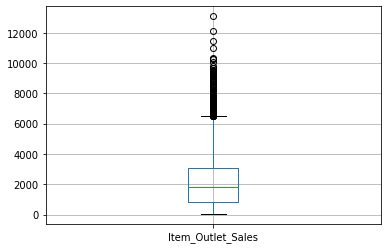

In [222]:
df.boxplot(column=['Item_Outlet_Sales'])
plt.show

<function matplotlib.pyplot.show>

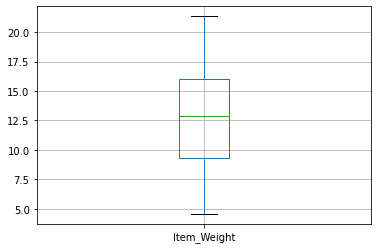

In [223]:
df.boxplot(column=['Item_Weight'])
plt.show

<function matplotlib.pyplot.show>

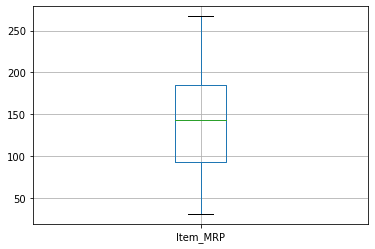

In [224]:
df.boxplot(column=['Item_MRP'])
plt.show

##Handling Outlier

<function matplotlib.pyplot.show>

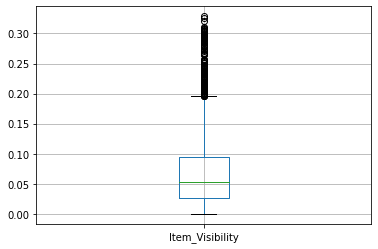

In [225]:
df.boxplot(column=['Item_Visibility'])
plt.show

<function matplotlib.pyplot.show>

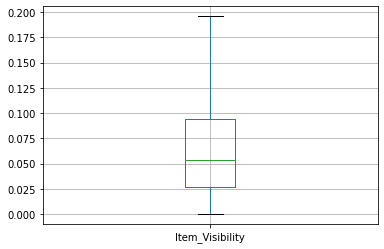

In [226]:
def replace_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_ranger=Q1-(1.5*IQR)
  upper_ranger=Q3+(1.5*IQR)
  return lower_ranger, upper_ranger
lowVisibility, uppVisibility = replace_outlier(df['Item_Visibility'])
df['Item_Visibility']=np.where(df['Item_Visibility']>uppVisibility,uppVisibility,df['Item_Visibility'])
df['Item_Visibility']=np.where(df['Item_Visibility']<lowVisibility,lowVisibility,df['Item_Visibility'])
df.boxplot(column=['Item_Visibility'])
plt.show

##Bivariate Analysis

In [218]:
# Correlation between all the variables
productDf.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.011928,0.024756,0.011550
Item_Visibility,-0.011928,1.000000,-0.001163,-0.117918
Item_MRP,0.024756,-0.001163,1.000000,0.567574
Item_Outlet_Sales,0.011550,-0.117918,0.567574,1.000000


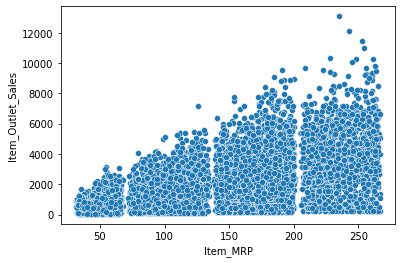

In [219]:
sns.scatterplot(x=productDf['Item_MRP'],y=productDf['Item_Outlet_Sales'])